<img src = 'imagens/logo.jpg'>

# <center><span style = "font-family:Times New Roman"><font color = #0f4e8c>Regressões Regularizadas

Nesta aula vamos falar sobre Regressões Regularizadas, em especial, as regressões regularizadas **Lasso** e **Ridge**.

Antes de começarmos, precisamos falar sobre alguns pontos que são chave para compreender o funcionamento e aplicações das regressões regularizadas.

## <span style = "font-family:Times New Roman"><font color = #0f4e8c>1. Sobreajuste, Subajuste e Complexidade

Uma das características mais importantes de um modelo de machine learning é a sua capacidade de **generalização**, em outras palavras, a capacidade de fazer boas previsões com dados inéditos.

Normalmente modelos são incapazes de generalizar por dois motivos:
1. Não se ajustaram bem aos dados de treino;
2. Se ajustaram demais aos dados de treino

O primeiro caso é chamado de <font color = #0f4e8c>*Subajuste*<font color = 'black'>, o segundo de <font color = #0f4e8c>*Sobreajuste*<font color = 'black'>.

Estes fenômenos podem acontecer por vários motivos, um deles (e muito comum) é a *complexidade* dos modelos.

$\triangleright$ <font color = #ACAF1F>***No contexto da Regresssão Linear, a complexidade do modelo é definida pelo número de variáveis preditoras.***

$\triangleright$ <font color = #ACAF1F>***Em Árvores de Decisão, está ligada à profundidade da árvore. Em modelos de Vizinhos Próximos, ao número de vizinhos.***

Modelos muito complexos tendem a capturar informações irrelevantes, porém específicas, do conjunto de treino (*noise*, ou *ruído*). Isso faz com que a performance deles no conjunto de treino seja elevada. Quando estes modelos são alimentados com dados inéditos (conjunto de  teste), observamos uma queda acentuada na performance.

<img src = 'imagens/model-over-fitting.png'>

<center><font size = 1>Imagem 1. IBM - Overfitting (https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png)

A imagem acima exemplifica bem a ideia de sobreajuste e subajuste no contexto da classificação.

## <font color = #0f4e8c>2. Trade-off viés-variância

O trade-off entre viés e variância é um conceito de extrema importância para a ciência de dados, e um dos motivos pelos quais utilizamos métodos de regularização.

Olhando para a imagem 1, vemos que quando ocorre *subajuste* temos viés (*bias*) alto. No *sobreajuste*, por sua vez, temos variância (*variance*) alta. Para entendermos isso precisamos conceituar Viés, Variância e como eles se relacionam com o erro do modelo.

### <font color = #0f4e8c>2.1 Viés
---
O viés é a diferença entre o valor médio das previsões do modelo (valor esperado $E[\space ]$) e o valor real que estamos tentando prever.

Formalmente:

#### Viés $ = E[\hat{f}(x)] - f(x)$

Um modelo com viés alto não se ajusta bem aos dados de treino, levando ao *subajuste* $\rightarrow$ erro de treino e teste altos.

### <font color = #0f4e8c>2.2 Variância
---
A variância é a variabilidade das previsões do modelo.

Formalmente:
#### Variância $= E\left[(\hat{f}(x) - E[\hat{f}(x)])^2\right]$ 

Um modelo com variância alta se ajusta muito aos dados de treino, levando ao *sobreajuste* $\rightarrow$ erro de treino baixo e de teste alto.

Abaixo está uma imagem que ilustra como o viés e a variância impactam nas previsões do modelos.

<img src = 'imagens/bias-variance-tradeoff.jpg'>

[Imagem 2. Bias Variance Trade-off.](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/bias_vs_variance_swxhxx.jpg)


Podemos formalizar este comportamento olhando para o Erro Quadrático do modelo.

O erro do modelo pode ser definido como:

#### <center> $e =  E\left [(Y - \hat{f}(x))^2\right ]$

Podemos decompô-lo da seguinte maneira:
#### <center>$e = \left(E[\hat{f}(x)] - f(x)\right )^2 + E\left [(\hat{f}(x) - E[\hat{f}(x)])^2\right ] +\sigma_e^2 $

Voltando às definições de viés e variância, vemos que o erro é composto por três componentes:

### <center> $e = Vies^2 + Variancia + Erro\space Irredutível$

Modelos simples tendem a ter baixa variância e viés alto, levando ao subajuste. À medida que a complexidade do modelo aumenta, abrimos mão do viés e introduzimos variância.

Este é o trade-off que existe entre viés e variância.

```
Ao diminuir o viés para aumentar o ajuste do modelo aos dados (evitar subajuste), nós introduzimos variância ao modelo, correndo o risco de construir um modelo sobreajustado aos dados de treino.
```

Para demonstrar demonstrar na prática estes conceitos e suas implicações, vamos utilizar o conjunto de dados Boston House Prices. O conjunto está disponível na biblioteca `mlxtend`, que usaremos para decompor o erro do modelo. Além disso, utilizaremos um algoritmo de Árvore de Decisão.

Escolhi este algoritmo porque ele permite que a complexidade do modelo seja controlada por meio de parâmetros definidos por nós.

No exemplo treinei 28 modelos de árvore de decisão, cada um menos complexo que o anterior. A biblioteca `mlxtend` calcula o MSE para cada um dos modelos o decompõem entre viés e variância. Estes valores foram armazenados em um DataFrame, que utilizei para construir este gráfico. 

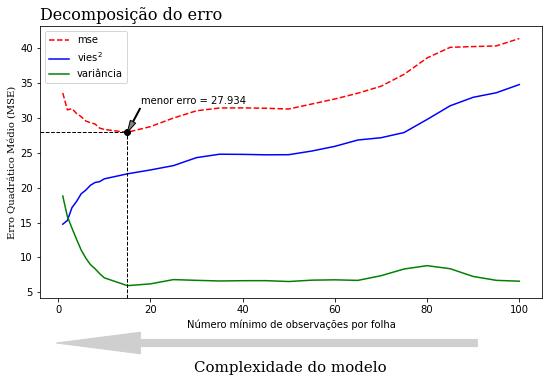

Nele, vemos que à medida em que o modelo fica mais complexo o viés (e o erro como um todo) diminui, indicando que o modelo está se ajustando melhor aos dados. Com 15 observações por folha temos nosso melhor modelo.

A partir deste ponto a variância passa a aumentar, levando o erro para cima. Isso indica que o modelo está se ajustando *demais* aos dados, ou seja, está sobreajustado.

---
Agora que entendemos como o viés e variância se relacionam entre si e com a complexidade do modelo, podemos entrar de fato nas regressões regularizadas. 

## <font color = #0f4e8c>3. <u>Regularização<u/>

*Regularização* é o nome dado ao conjunto de técnicas focadas em reduzir o sobreajuste em modelos de aprendizado de máquina.

De uma maneira simples, ela consiste em introduzir viés ao modelo de forma que a sua variância diminua.

Existem várias técnicas de regularização, nesta aula vamos falar sobre as regularizações $\ell_1$ e $\ell_2$.

## <font color = #0f4e8c>4. <u>Regressões Regularizadas

Em modelos de regressão linear, a complexidade do modelo é determinada pelo número de variáveis preditoras ($p$) do conjunto. 

À medida que $p$ se aproxima do número de observações ($n$), a variância do modelo tende ao infinito. Em outras palavras, quando temos muitas variáveis preditoras em nosso modelo seus coeficientes tendem a ser superestimados, levando ao sobreajuste.

Temos duas opções para contornar este problema:
1. Encolher os coeficientes das variáveis preditoras $p$;
2. Reduzir o número de $p$.

As regressões regularizadas se enquadram na primeira opção.

Como dito no início da aula iremos falar sobre as regressões Ridge e Lasso.

Independente do método, a regularização de regressões consiste em <font color = #0f4e8c>***adicionar um termo de <font color = 'red'>penalização<font color = #0f4e8c> à de função de custo da regressão.***

## <font color = #0f4e8c>4.1 <u>Regressão Ridge ($\ell_2$)

A regressão Ridge é utilizada quando queremos manter o número de variáveis preditoras, porém encolhendo seus coeficientes.

Ela também é chamada de <font color = #0f4e8c>*Regularização $\ell_2$*<font color = 'black'>, pois adiciona a *norma* $\ell_2$ dos coeficientes na função de custo para encolher os coeficientes da regressão:
 

### <center>$L_{linear}(\hat{\beta}) = RSS \implies L_{ridge}(\hat{\beta}) = RSS + \lambda \cdot\ell_2(\beta) \space \implies$ 

### <center>$L_{ridge}(\hat\beta) = RSS + \lambda\sum_{j=1}^{p}\beta_j^2 \implies$

### <center>$L_{ridge}(\hat\beta) = RSS + \lambda||\hat\beta||_2$

Abrindo a equação:

### <center>$L_{ridge}(\hat\beta) = \sum_{i=1}^{n}{\bigg(y_i - \hat\beta_0 - \sum_{j=1}^{p}({\hat\beta_j x_{ij})}\bigg)^2} + \lambda\sum_{j=1}^{p}{\hat{\beta}^{2}_{j}}$

O parâmetro $\lambda$ controla a força da regularização. Se este for 0, a função de custo será a $RSS$ e teremos um modelo de regressão linear comum. À medida em que $\lambda$ aumenta, as estimativas de $\beta$ diminuem. No limite, quando $\lambda$ tende ao infinito, $\beta$ tende a zero.
* $\lambda = 0 \implies RSS$
* $\lambda \rightarrow \infty, \space \hat\beta_{ridge} \rightarrow 0$

## <font color = #0f4e8c>4.1 <u>Regressão Lasso ($\ell_1$)

A regressão Lasso é muito parecida com a Ridge, sua única diferença é que utilizamos a norma $\ell_1$ para controlar os coeficientes.

A sua função de custo é a seguinte:

### <center>$L_{lasso}(\hat\beta) = RSS + \lambda||\hat\beta||_1$

Abrindo a equação:

### <center>$L_{lasso}(\hat\beta) = \sum_{i=1}^{n}{\bigg(y_i - \hat\beta_0 - \sum_{j=1}^{p}({\hat\beta_j x_{ij})}\bigg)^2} + \lambda\sum_{j=1}^{p}|{\hat{\beta}_{j}}|$

Na regressão Ridge os coeficientes são encolhidos até próximo de zero, porém não atingem este valor. Isso muda na regressão Lasso.

Ao utilizarmos a norma $\ell_1$ ($|\hat\beta|$) os coeficientes $\beta$ menos importantes são zerados. Isso faz com que a regressão Lasso possa ser utilizada para selecionar atributos do modelo.

---

## <font color = #0f4e8c>5. <u>Aplicações com código

Agora que vimos a teoria por trás das regressões regularizadas, vamos ver seu comportamento na prática.

Vamos seguir o seguinte roteiro:
1. Pré-processamento;
    1. Imputação;
    2. Standartização
2. Modelagem e avaliação: Regressão Linear;
3. Modelagem e avaliação: Regressão Ridge;
4. Modelagem e avaliação: Regressão Lasso

Como o intuito desta aula é demonstrar o *funcionamento* das regressões regularizadas e como elas podem impactar o desempenho de modelos sobreajustados, as estapas de pré-processamento não irão focar em melhorar a qualidade dos dados para o modelo.

<br>

O conjunto de dados utilizado será o mesmo da aula de regressão linear.

In [1]:
# importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
# carregando dados

df = pd.read_csv('dados\dados.csv')
df = df.select_dtypes(include = ['int64', 'float64'])

In [3]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1051,20,73.0,8993,7,5,2007,2007,0.0,0.0,...,0,22,0,0,0,0,0,8,2007,176485.0
1,1094,20,71.0,9230,5,8,1965,1998,166.0,661.0,...,0,64,0,0,0,0,0,10,2006,146000.0
2,662,60,52.0,46589,8,7,1994,2005,528.0,1361.0,...,517,76,0,0,0,0,0,7,2009,402000.0
3,1859,90,64.0,7018,5,5,1979,1979,0.0,0.0,...,0,0,0,0,0,0,0,6,2009,NaN
4,1370,20,48.0,10635,8,5,2003,2003,171.0,370.0,...,0,262,0,0,0,0,0,5,2010,232000.0


In [4]:
df.shape

(2919, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [6]:
# Excluindo coluna identificadora

df = df.drop(['Id'], axis = 1)

In [7]:
# Separando X e y

X = df.drop('SalePrice', axis = 1)
y = df[['SalePrice']]

In [8]:
# Separando amostras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [9]:
print(X_train.shape, X_test.shape)

(2043, 36) (876, 36)


<br>

## <font color = #0f4e8c> 1. Pré-processamento

### <font color = #0f4e8c>1.1 Imputação

In [10]:
X_train.isnull().sum().sort_values(ascending = False).head(10)

LotFrontage     345
GarageYrBlt     117
MasVnrArea       17
BsmtHalfBath      1
BsmtFullBath      1
MSSubClass        0
GarageArea        0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
dtype: int64

Farei a imputação dos dados com a media.

In [11]:
imputer = SimpleImputer()

X_train = imputer.fit_transform(X_train)

### <font color = #0f4e8c> 1.3 Standartização

In [12]:
# Instanciando objeto

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

### <font color = #0f4e8c> 1.4 Teste e preditoras

In [14]:
X_test = imputer.fit_transform(X_test)

In [15]:
X_test = scaler.fit_transform(X_test)

In [16]:
# y_train
# imputando
y_train = imputer.fit_transform(y_train)
y_train = scaler.fit_transform(y_train)


# y_test
# imputando
y_test = imputer.fit_transform(y_test)
y_test = scaler.fit_transform(y_test)

In [17]:
print(X_test.shape, y_test.shape)

(876, 36) (876, 1)


<br>

## <font color = #0f4e8c>2. Regressão Linear

In [18]:
# Instanciando o modelo
lin_model = LinearRegression()

# Fitando o modelo
lin_model.fit(X_train, y_train)

# Previsões
y_lin_train = lin_model.predict(X_train)
y_lin_test = lin_model.predict(X_test)

<br>

### <font color = #0f4e8c>2.1 Avaliação

In [19]:
# importando módulos

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [20]:
# Métricas conjunto de treino

print(f'O R^2 do modelo no treino é de: {round(lin_model.score(X_train, y_train), 4)}')
print(f'O erro quadrático médio do modelo no treino é de: {round(mse(y_train, y_lin_train), 4)}')
print(f'O erro médio absoluto do modelo no treino é de: {round(mae(y_train, y_lin_train), 4)}')

O R^2 do modelo no treino é de: 0.4306
O erro quadrático médio do modelo no treino é de: 0.5694
O erro médio absoluto do modelo no treino é de: 0.5391


<br>

In [21]:
# Métricas conjunto de teste

print(f'O R^2 do modelo no teste é de: {lin_model.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_lin_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_lin_test)}')

O R^2 do modelo no teste é de: -1.3289117562172288e+22
O erro quadrático médio do modelo no teste é de: 1.3289117562172288e+22
O erro médio absoluto do modelo no teste é de: 91183727792.50899


<br>

Podemos ver que todas as métricas pioram drasticamente quando alimentamos o modelo com dados não vistos. Isso é um grande indicativo de que o modelo está <font color = #0f4e8c>**sobreajustado**.

Utilizando a biblioteca `mlxtend` podemos decompor o erro entre viés e variância.

In [22]:
from mlxtend.evaluate import bias_variance_decomp

In [23]:
mser, vies, variancia = bias_variance_decomp(lin_model,
                                            X_train,
                                            y_train.reshape((-1,)),
                                            X_test,
                                            y_test.reshape((-1,)),
                                            loss = 'mse',
                                            random_seed = 123)

In [24]:
print(f'A parcela do erro de teste correspondente ao víes é de: {vies}')
print(f'A parcela do erro correspondente à variância é de: {variancia}')

A parcela do erro de teste correspondente ao víes é de: 1.0419264095914784e+20
A parcela do erro correspondente à variância é de: 1.4271805379235616e+22


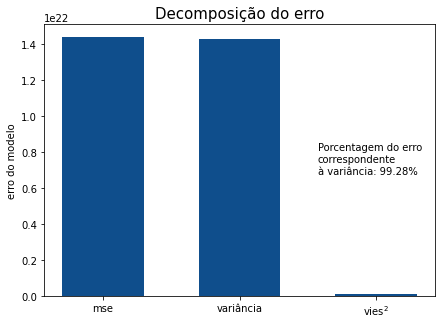

In [25]:
# Visualização

fig, ax = plt.subplots(figsize = (7,5))

ax.bar(x = [-1, 0 ,1], height = [mser, variancia, vies], width = .6, color = '#0f4e8c')
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['mse', 'variância', r'vies$^2$'])
ax.set_ylabel('erro do modelo')
ax.set_title('Decomposição do erro', fontsize = 15)

texto = f"""Porcentagem do erro
correspondente
à variância: {round(variancia/mser, 4)*100}%"""
ax.annotate(text = texto, xy = (0.7, 0.45), xycoords = 'axes fraction')

plt.show()

Na visualização, vemos que a variância corresponde a mais 99% do erro do modelo nos dados de teste.
Isso corrobora a hipótese de que está ocorrendo sobreajuste (viés baixo e variância alta $\implies$ erro de treino $<$ erro de teste $\implies$ sobreajuste).

<br>

Agora vamos treinar modelos de regressão Rigde e Lasso e ver como o erro e os coeficientes se comportam.

<br>

## <font color = #0f4e8c>3. Regressão Ridge

Na função de custo Ridge ($L_{ridge}(\hat\beta) = RSS + \lambda||\hat\beta||_2$), o parâmetro $\lambda$ controla a força da regularização.

Esse tipo de parâmetro é chamado de *hiperparâmetro*, e ele influencia na performance do modelo e deve ser definido pelo usuário.

Vamos utilizar o módulo `RidgeCV` para otimizar o hiperparâmetro $\lambda$.

Este módulo se baseia em utilizar Validação Cruzada para determinar o mehor $\lambda$ para o modelo (o conceito de Validação Cruzada será melhor explicado na próxima aula).

### <font color = #0f4e8c>3.1 Otimização de hiperparâmetros

In [26]:
ridgecv = RidgeCV(alphas = np.logspace(-3,6,100))

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.23284674e-03, 1.51991108e-03, 1.87381742e-03,
       2.31012970e-03, 2.84803587e-03, 3.51119173e-03, 4.32876128e-03,
       5.33669923e-03, 6.57933225e-03, 8.11130831e-03, 1.00000000e-02,
       1.23284674e-02, 1.51991108e-02, 1.87381742e-02, 2.31012970e-02,
       2.84803587e-02, 3.51119173e-02, 4.32876128e-02, 5.33669923e-02,
       6.57933225e-02, 8.11130831e-0...
       8.11130831e+03, 1.00000000e+04, 1.23284674e+04, 1.51991108e+04,
       1.87381742e+04, 2.31012970e+04, 2.84803587e+04, 3.51119173e+04,
       4.32876128e+04, 5.33669923e+04, 6.57933225e+04, 8.11130831e+04,
       1.00000000e+05, 1.23284674e+05, 1.51991108e+05, 1.87381742e+05,
       2.31012970e+05, 2.84803587e+05, 3.51119173e+05, 4.32876128e+05,
       5.33669923e+05, 6.57933225e+05, 8.11130831e+05, 1.00000000e+06]))

In [27]:
best_alpha = ridgecv.alpha_

In [28]:
ridge = Ridge(alpha = best_alpha)

In [29]:
ridge.fit(X_train, y_train)

Ridge(alpha=284.8035868435805)

In [30]:
y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)

### <font color = #0f4e8c>3.2 Avaliação

In [31]:
print(f'O R^2 do modelo no treino é de: {ridge.score(X_train, y_train)}')
print(f'O erro quadrático médio do modelo no treino é de: {mse(y_train, y_ridge_train)}')
print(f'O erro médio absoluto do modelo no treino é de: {mae(y_train, y_ridge_train)}')

O R^2 do modelo no treino é de: 0.4265814057459779
O erro quadrático médio do modelo no treino é de: 0.5734185942540221
O erro médio absoluto do modelo no treino é de: 0.5394782395006565


<br>

In [32]:
print(f'O R^2 do modelo no teste é de: {ridge.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_ridge_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_ridge_test)}')

O R^2 do modelo no teste é de: 0.38848309494377764
O erro quadrático médio do modelo no teste é de: 0.6115169050562224
O erro médio absoluto do modelo no teste é de: 0.5419314856540257


A queda de performance entre treino e teste foi bem menor neste modelo. Enquanto na regressão linear o coeficiente de ajustamento $R^2$ diminuiu em mais de 20 ordens de magnitude, neste caiu em aproximadamente 0.04

### <font color = #0f4e8c>3.3 Decomposição do erro

In [33]:
mser_ridge, vies_ridge, variancia_ridge = bias_variance_decomp(ridge,
                                             X_train,
                                             y_train.reshape((-1,)),
                                             X_test,
                                             y_test.reshape((-1,)),
                                             loss = 'mse',
                                             random_seed = 42)

In [34]:
print(f'A parcela do erro de teste correspondente ao víes é de: {vies_ridge}')
print(f'A parcela do erro correspondente à variância é de: {variancia_ridge}')

A parcela do erro de teste correspondente ao víes é de: 0.6092349594298874
A parcela do erro correspondente à variância é de: 0.010983339930232565


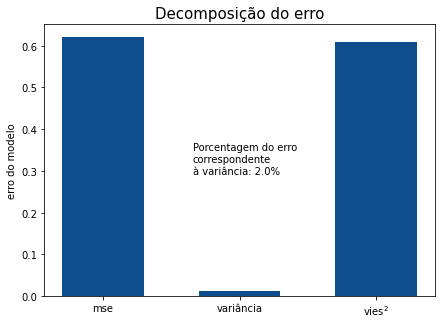

In [35]:
# Visualização

fig, ax = plt.subplots(figsize = (7,5))

ax.bar(x = [-1, 0 ,1], height = [mser_ridge, variancia_ridge, vies_ridge], width = .6, color = '#0f4e8c')
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['mse', 'variância', r'vies$^2$'])
ax.set_ylabel('erro do modelo')
ax.set_title('Decomposição do erro', fontsize = 15)

texto = f"""Porcentagem do erro
correspondente
à variância: {round(variancia_ridge/mser_ridge, 2)*100}%"""
ax.annotate(text = texto, xy = (0.38, 0.45), xycoords = 'axes fraction')

plt.show()

Como era esperado, a regressão Ridge introduziu viés ao modelo para reduzir a variância. Apesar dele ainda performar melhor nos dados de treino, sua capacidade de generalização melhorou drasticamente.

Vamos olhar os coeficientes da regressão.

### <font color = #0f4e8c>3.4 Coeficientes

In [36]:
# Melhores coeficientes

best_coef = ridge.coef_

In [37]:
# Coeficientes em função de alpha (lambda)

alphas = ridgecv.alphas
coefs = []

for a in alphas:
    ridge_clf = RidgeCV(alphas = [a], fit_intercept = False).fit(X_train, y_train)
    coefs.append(ridge_clf.coef_)

coefs = np.array(coefs)
coefs_array = coefs.reshape((100,-1,))

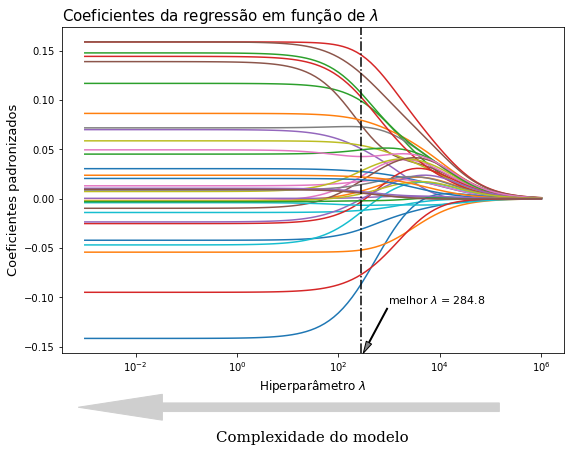

In [38]:
# Visualizando os coeficientes

from matplotlib.patches import Arrow

fig, ax = plt.subplots(figsize = (9,6))

x = alphas
ax.semilogx(x, coefs_array)

ax.set_title(r'Coeficientes da regressão em função de $\lambda$', fontsize = 15, loc = 'left')
ax.set_xlabel(r'Hiperparâmetro $\lambda$', fontsize = 12)
ax.set_ylabel(r'Coeficientes padronizados', fontsize = 13)

ax.axvline(x = best_alpha, linestyle = '-.', color = 'black')

seta = Arrow(x = .8, y = 0, dx = -.65, dy = 0, width = .1, color = '#CFCFCF')
fig.add_artist(seta)
fig.text(x = .362, y = -.08, s = 'Complexidade do modelo', fontdict = {'fontsize': 15,
                                                                     'family': 'serif'})

texto = fr'melhor $\lambda$ = {round(best_alpha,2)}'

ax.annotate(text = texto,
            xy = (.6, 0),
            xytext = (.65, .15),
            xycoords = 'axes fraction',
            fontsize = 11,
            arrowprops = dict(facecolor = '#828385',
                              edgecolor = 'black',
                              width = 1,
                              headwidth = 6))

plt.show()

Podemos ver como os coeficientes se comportam quando variamos a força da regularização (parâmetro $\lambda$). Quanto mais regularização, mais próximos de zero os coeficientes ficam, tornando o modelo maois simples.


<br>

## <font color = #0f4e8c>4. Regressão Lasso

Assim como a Ridge, a regressão Lasso também possui um hiperparâmetro $\lambda$ responsável por controlar a regularização.

Analogamente ao que foi feito anteriormente, vamos utilizar o módulo `LassoCV` para realizar a otimização do hiperparâmetro.

### <font color = #0f4e8c>4.1 Otimização de hiperparâmetros

In [39]:
lassocv = LassoCV()

In [40]:
lassocv.fit(X_train, y_train.ravel())

LassoCV()

In [41]:
alpha = lassocv.alpha_

In [42]:
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)

y_lasso_train = lasso.predict(X_train)
y_lasso_test = lasso.predict(X_test)

### <font color = #0f4e8c>4.2 Avaliação

In [43]:
print(f'O R^2 do modelo no treino é de: {lasso.score(X_train, y_train)}')
print(f'O erro quadrático médio do modelo no treino é de: {mse(y_train, y_lasso_train)}')
print(f'O erro médio absoluto do modelo no treino é de: {mae(y_train, y_lasso_train)}')

O R^2 do modelo no treino é de: 0.42880815277655115
O erro quadrático médio do modelo no treino é de: 0.5711918472234488
O erro médio absoluto do modelo no treino é de: 0.5388457885263831


<br>

In [44]:
print(f'O R^2 do modelo no teste é de: {lasso.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_lasso_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_lasso_test)}')

O R^2 do modelo no teste é de: 0.3862934468798481
O erro quadrático médio do modelo no teste é de: 0.6137065531201519
O erro médio absoluto do modelo no teste é de: 0.5417313122503888


<br>

### <font color = #0f4e8c>4.3 Decomposição do erro

In [45]:
mser_lasso, vies_lasso, variancia_lasso = bias_variance_decomp(lasso,
                                             X_train,
                                             y_train.reshape((-1,)),
                                             X_test,
                                             y_test.reshape((-1,)),
                                             loss = 'mse',
                                             random_seed = 42)

In [46]:
print(f'A parcela do erro de teste correspondente ao víes é de: {vies_lasso}')
print(f'A parcela do erro correspondente à variância é de: {variancia_lasso}')

A parcela do erro de teste correspondente ao víes é de: 0.6109558744146866
A parcela do erro correspondente à variância é de: 0.013018383150043307


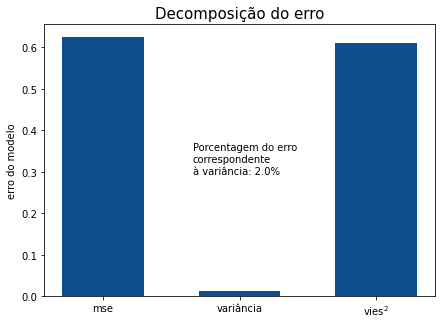

In [47]:
# Visualização

fig, ax = plt.subplots(figsize = (7,5))

ax.bar(x = [-1, 0 ,1], height = [mser_lasso, variancia_lasso, vies_lasso], width = .6, color = '#0f4e8c')
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['mse', 'variância', r'vies$^2$'])
ax.set_ylabel('erro do modelo')
ax.set_title('Decomposição do erro', fontsize = 15)

texto = f"""Porcentagem do erro
correspondente
à variância: {round(variancia_lasso/mser_lasso, 2)*100}%"""
ax.annotate(text = texto, xy = (0.38, 0.45), xycoords = 'axes fraction')

plt.show()

Assim como na regressão Ridge, introduzimo viés no modelo para reduzir sua variância.

A diferença maior entre os dois modelos está nos coeficientes, vamos para eles agora.

In [48]:
# Melhores coeficientes

best_alpha_lasso = lassocv.alpha_

In [49]:
best_alpha_lasso

0.006242190980390557

In [50]:
# Coeficientes em função de alpha (lambda)

alphas_lasso = np.linspace(0.0001,5,100)
lasso = Lasso(max_iter=10000)
coefs_lasso = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

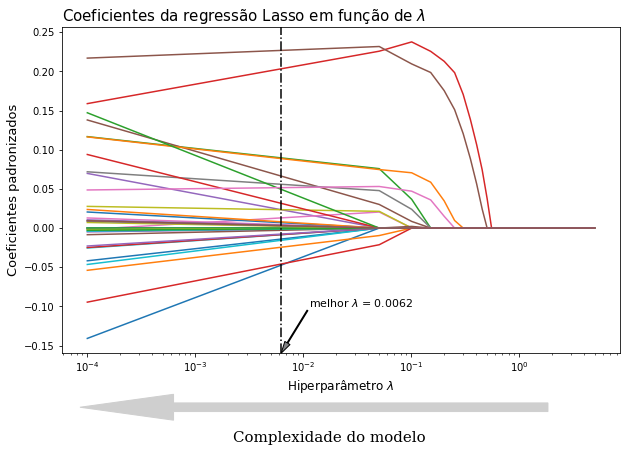

In [51]:
fig, ax = plt.subplots(figsize = (10,6))

ax.semilogx(alphas_lasso, coefs_lasso)
ax.set_xlabel(r'Hiperparâmetro $\lambda$', fontsize = 12)
ax.set_ylabel('Coeficientes padronizados', fontsize = 13)
ax.set_title('Coeficientes da regressão Lasso em função de $\lambda$', fontsize = 15, loc = 'left')

ax.axvline(x = best_alpha_lasso, linestyle = '-.', color = 'black')

texto = f'melhor $\lambda$ = {round(best_alpha_lasso,4)}'

ax.annotate(text = texto,
            xy = (best_alpha_lasso, ax.get_ylim()[0]),
            xytext = (best_alpha_lasso + .005, -.1),
            fontsize = 11,
            arrowprops = dict(facecolor = '#828385',
                              edgecolor = 'black',
                              width = 1,
                              headwidth = 6))
            

seta = Arrow(x = .8, y = 0, dx = -.65, dy = 0, width = .1, color = '#CFCFCF')
fig.add_artist(seta)
fig.text(x = .362, y = -.08, s = 'Complexidade do modelo', fontdict = {'fontsize': 15,
                                                                     'family': 'serif'})
    
plt.show()

Aqui vemos que, assim como na regressão Ridge, os coeficientes são encolhidos a medida que aumentamos o parâmetro $\lambda$, tornando o modelo mais simples.
Diferentemete da Ridge, entretanto, aqui os coeficientes de menor importância são zerados.

---

## <font color = #0f4e8c>Resumindo
$\diamond$ Causas comuns da baixa capacidade de generalização de modelos: <font color = 'blue'>subajuste<font color = 'black'> e <font color = 'red'>sobreajuste<font color = 'black'>;
 
$\diamond$ <font color = 'blue'>**Subajuste**
    
    - modelo não se ajusta bem aos dados;
    - predominância do viés no erro;
    - erros de treino e teste altos;
$\diamond$ <font color = 'red'>**Sobrajuste**
    
    - modelo se ajusta demais aos dados de treino;
    - sintoma de modelos complexos;
    - predominância da variância no erro;
    - erro de teste maior do que o de treino;
    
$\diamond$ <font color = #0f4e8c>**Trade-off Viés e Variância**
    
    - erro do modelo = viés^2 + variância + erro irredutível;
    - ao diminuir o viés do modelo, aumentamos sua variância e vice-versa;

$\diamond$ <font color = #0f4e8c> **Regularização**
    
    - técnicas para reduzir sobreajuste;
    - penaliza a Função de Custo da regressão;
    - reduz a variância do modelo;
    - hiperparâmetro lambda: força da regularização
    
$\diamond$ <font color = #0f4e8c> **Ridge**
    
    - regularização L2;
    - coeficientes tendem a zero;
    - penaliza coeficientes grandes;
    - lambda = 0 ---> RSS
    - lambda --> inf. ---> coeficientes --> 0
    
$\diamond$ <font color = #0f4e8c> **Lasso**
    
    - regularização L1;
    - coeficientes são zerados;
    - seleção de atributos
    
<br>

<h2><center><font color = #0f4e8c>Obrigado pela atenção!<center/><h2/>

<tr>
    <td> <img src="imagens/Fernando.png" width = "100" align = "left"/> <td/>
<tr/>

### Fernando Gioppato

<tr><td> <a href="https://www.linkedin.com/in/fernando-gioppato/" > <img src = "imagens/linkedin.png" width = "25"  align = "left" /> </a></td><td> <a href="https://github.com/feegioppato" > <img src = "imagens/github.png" width = "60" height = "100" align = "left" /> </a> </td></tr>

<br>

### Referâncias:
1 - [An Introduction to Statistical Learning](https://www.statlearning.com/)

2 - [Regularization Tutorial: Ridge, Lasso & Elastic Net Regression - DataCamp](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

3 - [bias_variance_decomp: Bias-variance decomposition for classification and regression losses - mlxtend](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#overview)

4 - [What is Overfitting? | IBM](https://www.ibm.com/cloud/learn/overfitting)